## Importando bibliotecas e dataset

In [17]:
#ignore some warning from sklearn library
import warnings
warnings.filterwarnings("ignore")

In [18]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn_extra.cluster import KMedoids
from sklearn.neighbors import NearestNeighbors
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Treating dataset

In [19]:
#wine dataset
#names = creating a header to wine dataset 
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", usecols=[1, 2], 
                 names=['Alcohol', 'Malic acid'])

#considering only the alcohol and malic acid from the wine dataset
df.head()

,Alcohol,Malic acid
0,14.23,1.71
1,13.20,1.78
2,13.16,2.36
3,14.37,1.95
4,13.24,2.59


In [20]:
df.describe(include = "all")

,Alcohol,Malic acid
count,178.000000,178.000000
mean,13.000618,2.336348
std,0.811827,1.117146
min,11.030000,0.740000
25%,12.362500,1.602500
50%,13.050000,1.865000
75%,13.677500,3.082500
max,14.830000,5.800000


## Plotting data

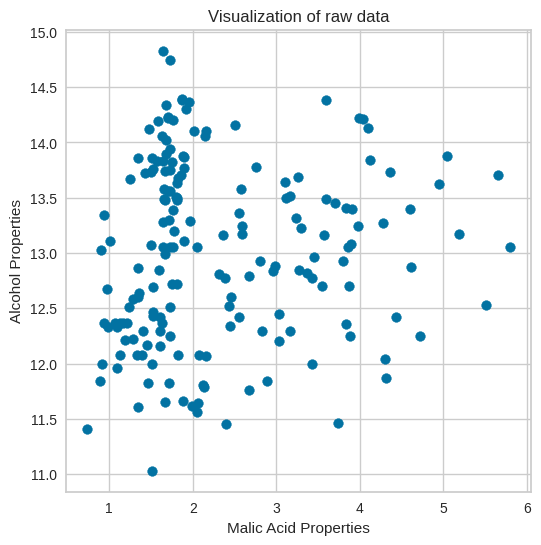

In [21]:

malic = df.iloc[:, 1]
alcohol = df.iloc[:, 0]

#plotting 
plt.figure(figsize=(6,6))
plt.scatter(malic, alcohol)

plt.xlabel('Malic Acid Properties')
plt.ylabel('Alcohol Properties')
plt.title('Visualization of raw data');


## Elbow method

Text(0, 0.5, 'SSE (Sum of squared distance)')

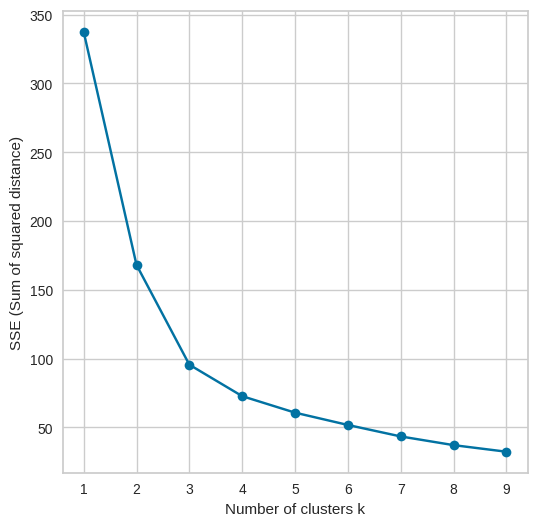

In [22]:
sse = [] #list of the sum of squared distance between the data points in each cluster
listk = list(range(1,10))

#interact with each k number possibility to find an elbow curve
for k in listk:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(6, 6))
plt.plot(listk, sse, '-o')
plt.xlabel(f'Number of clusters k')
plt.ylabel('SSE (Sum of squared distance)')

### Using KElbowVisualize from yellowbrick.cluster

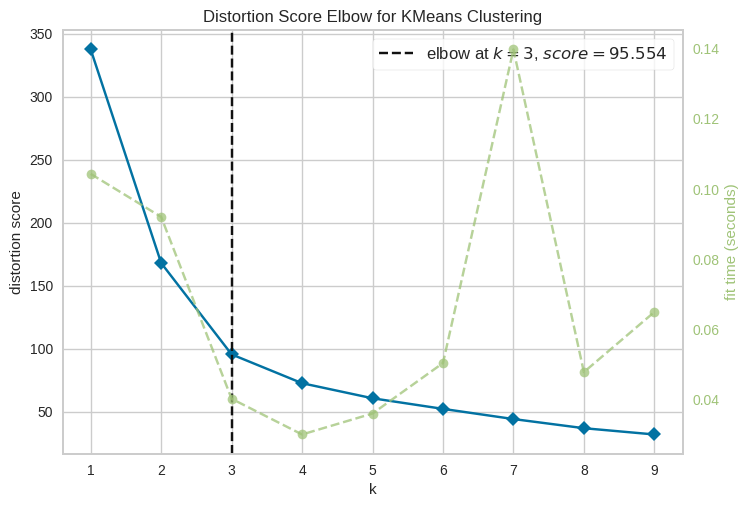

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(df)
visualizer.show()

## Silhouette

In [24]:
for i in range(2,10):
    kmean_cluster = KMeans(n_clusters= i)
    preds = kmean_cluster.fit_predict(df)
    kmeans_center = kmean_cluster.cluster_centers_

    score = metrics.silhouette_score(df, preds)
    print(f'The cluster number {i} has a silhouette value equal to {score}')

The cluster number 2 has a silhouette value equal to 0.4774557823729399
The cluster number 3 has a silhouette value equal to 0.4805357240626079
The cluster number 4 has a silhouette value equal to 0.45639433450218314
The cluster number 5 has a silhouette value equal to 0.44554528655948905
The cluster number 6 has a silhouette value equal to 0.4239584509070041
The cluster number 7 has a silhouette value equal to 0.3830845962295741
The cluster number 8 has a silhouette value equal to 0.3771401689976096
The cluster number 9 has a silhouette value equal to 0.3859616300126425


## KMean method
The Elbow method and the computing of the silhouette values shows us the best K number for our wine dataset.
So, now that we know that a good K number for our example is equal to '3', let's apply this value to a k-mean clustering


In [37]:
km = KMeans(n_clusters=3).fit(df)
cluster_labels = km.fit_predict(df)

centroids = km.cluster_centers_

### Plotting KMean

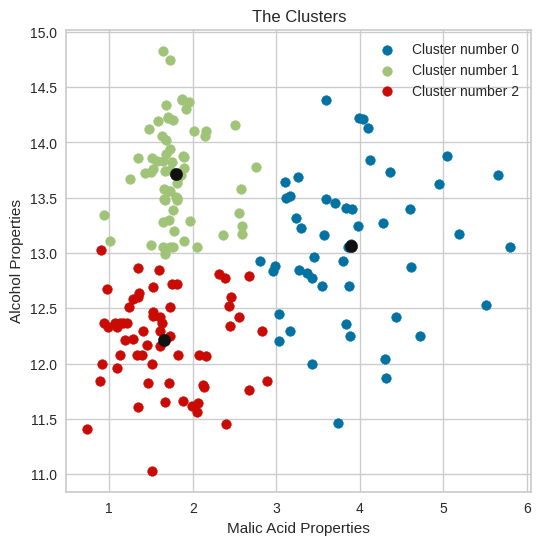

In [26]:
plt.figure(figsize=(6,6))

n_labels = np.unique(cluster_labels)

for labels in n_labels: #plotting each cluster from cluster_labels
    plt.scatter(df.iloc[cluster_labels == labels, 1], df.iloc[cluster_labels == labels, 0], 
                label = f'Cluster number {n_labels[labels]}')
    

plt.scatter(centroids[:, 1], centroids[:, 0], s = 80, color = 'k') #plotting the centroids of each cluster

plt.xlabel('Malic Acid Properties')
plt.ylabel('Alcohol Properties')
plt.title('The Clusters')
plt.legend()
plt.show()

## KMedoids method

In [27]:
kmedoids = KMedoids(n_clusters=3, random_state=1).fit(df)

kmds_labels = kmedoids.fit_predict(df)
kmds_center = kmedoids.cluster_centers_

### Plotting KMedoids

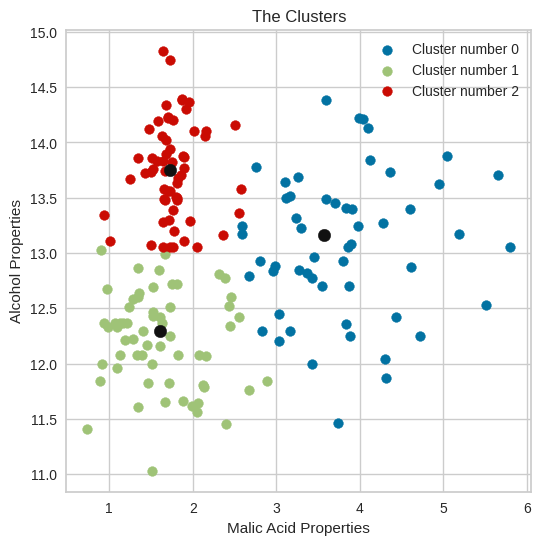

In [28]:
plt.figure(figsize=(6,6))
n_kmds = np.unique(kmds_labels)

for labels in n_kmds: #plotting each cluster from cluster_labels
    plt.scatter(df.iloc[kmds_labels == labels, 1], df.iloc[kmds_labels == labels, 0], 
                label = f'Cluster number {n_kmds[labels]}')
plt.scatter(kmds_center[:, 1], kmds_center[:, 0], s = 80, color = 'k') #plotting the centroids of each cluster

plt.xlabel('Malic Acid Properties')
plt.ylabel('Alcohol Properties')
plt.title('The Clusters')
plt.legend()
plt.show()

## DBSCAN

### Calculating the proximity of each data poin

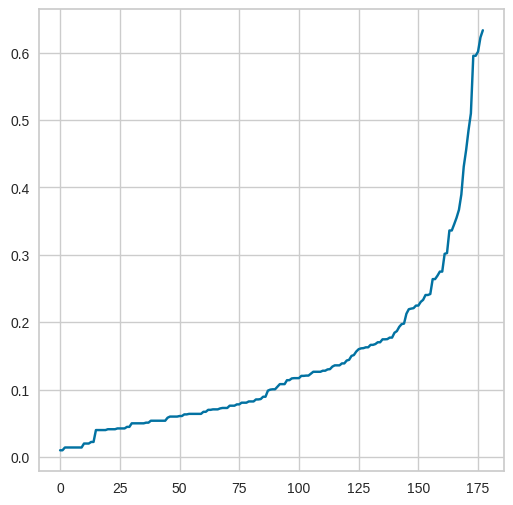

In [29]:
#looking for de epsilon (eps) value

neighb = NearestNeighbors(n_neighbors=2)
nbrs = neighb.fit(df)
dist, ind = nbrs.kneighbors(df)

dist = np.sort(dist, axis = 0)
dist = dist[:, 1]

plt.figure(figsize=(6,6))
plt.plot(dist)
plt.show()

### Applying DBSCAN Algorithm and finding the clusters

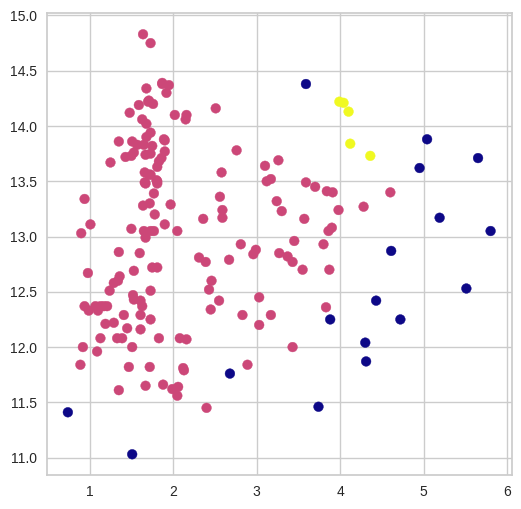

In [34]:
dbs_cluster = DBSCAN(eps = 0.4, min_samples= 4).fit(df)

dbs_labels = dbs_cluster.labels_

plt.figure(figsize=(6,6))
plt.scatter(df.iloc[:, 1], df.iloc[:, 0], c = dbs_labels, cmap='plasma')
plt.show()